In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [57]:
from IPython.display import display

In [3]:
sp.init_printing()

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

# Enoncé

Consider a monopoly market in which consumers’ opportunity cost $x$ is uniformly distributed on the unit interval; i.e.,$x\in [0, 1]$. 
A consumer’s utility of consuming one unit of the good offered by the monopolist relative to the outside option is $\frac{1}{4} + \frac{n^e}{2} -p - x$, where 
- $p$ is the price set by the monopo list 
- $n^e$ is the expected number of fellow buyers of the good. 
There is mass one of consumers. 
The monopolist’s marginal costs are zero.

In [4]:
ne, p, x = sp.symbols("n^e p x")
ne, p, x

In [5]:
utilite_consommateur = sp.S(1) / 4 + ne / 2 - p - x
utilite_consommateur

# Question 1

Suppose that consumers believe that $n^e = 1$.
Determine the monopoly solution under these consumer believes.

**TODO** Pourquoi résoud-on $utilite_{consommateur} = 0$?

In [6]:
equation = sp.Eq(utilite_consommateur.subs(ne, 1), 0)
equation

In [8]:
x1, = sp.solve(equation, x)
x1

In [9]:
profit = p * x1
profit

On cherche alors
$$ \underset{p\in \mathbb{R}^+}{\sup} \mathrm{profit}$$

Comme on a 

In [11]:
sp.limit(profit, p, +sp.oo)

On en déduit que le $\sup$ est un $\max$.

Si il est atteint à l'intérieur on a

In [23]:
pm, = sp.solve(sp.diff(profit, p), p)
pm

In [27]:
nm, = sp.solve(utilite_consommateur.subs({ne: 1, p: pm}), x)
nm

In [28]:
profitm = profit.subs(p, pm)
profitm

In [29]:
sp.diff(profit, p, p)

Le profit est une fonction concave, on en déduit donc qu'un point critique est un maximum global.

**REMARQUE** on aurait pu comparer la valeur en ce point avec la valeur au bord et prendre la plus grande des deux.

In [30]:
profit.subs(p, 0)

# Question 2

Suppose that consumers form beliefs $n^e$ before observing price $p$ and that these beliefs are confirmed in equilibrium; i.e. 
$$n^e=n^∗.$$ 
Determine the monopoly solution under these consumer beliefs.

In [31]:
equation2 = sp.Eq(utilite_consommateur, 0)
equation2

In [32]:
x2, = sp.solve(equation2, x)
x2

In [33]:
profit2 = p * x2
profit2

In [34]:
sp.latex(profit2)

'p \\left(\\frac{n^{e}}{2} - p + \\frac{1}{4}\\right)'

On cherche donc à résoudre

$$
\underset{p\geq 0}{\sup} p \left(\frac{n^{e}}{2} - p + \frac{1}{4}\right)
$$

Comme

In [36]:
sp.limit(profit2, p, + sp.oo)

Le $\sup$ est atteint, et on a un $\max$.

Si il est atteint en un point intérieur on a forcément un point critique:

In [38]:
pm2, = sp.solve(sp.diff(profit2, p), p)
pm2

In [40]:
ns, = sp.solve(utilite_consommateur.subs({p: pm2}), x)
ns

Comme on a

In [46]:
sp.diff(profit2, p, p)

Le profit est concave par rapport à $p$ et un point critique est forcément un maximum global.

Comme par hypothèse $n^* = n^e$ on a 

In [41]:
equation2b = sp.Eq(ns, ne)
equation2b

In [43]:
ne2, = sp.solve(equation2b, ne)
ne2

In [45]:
profit2b = profit2.subs(ne, ne2)
profit2b

On refait la démarche précédente

In [47]:
sp.limit(profit2b, p, +sp.oo)

In [49]:
pm2b, = sp.solve(sp.diff(profit2b, p), p)
pm2b

In [90]:
nm2 = ne2
display(nm2)

In [50]:
profit2b.subs(p, pm2b)

**ATTENTION** il faudrait argumenter que les points critiques sont bien strictement dans l'intérieur du domaine de maximisation.
On peut au moment de la création de symboles rajouter de l'information à priori via des argument nommés de type `positive=True` et `real=True`.

# Question 3

Suppose that consumers first observe price and then form beliefs
$$n^e(p)$$ 
and that beliefs are self-fulfilling; i.e., they are confirmed in the monopoly solution. 
Determine the monopoly solution under these consumer beliefs.

In [71]:
x3, = sp.solve(utilite_consommateur, x)
x3

In [72]:
equation3 = sp.Eq(x3, ne)
display(equation3)
n3, = sp.solve(equation3, ne)
display(n3)

In [73]:
profit3 = x3.subs({ne: n3}) * p
display(profit3)
print(sp.latex(profit3))


p \left(\frac{1}{2} - 2 p\right)


On cherche à résoudre
$$
\underset{p\geq 0}{\sup} p \left(\frac{1}{2} - 2 p\right)
$$
Comme

In [74]:
sp.limit(profit3, p, +sp.oo)

Le $\sup$ est en fait un $\max$.
S'il est atteint à l'intérieur c'est forcément un point critique.

In [75]:
equation3b = sp.Eq(sp.diff(profit3, p), 0)
display(equation3b)
pm3, = sp.solve(equation3b, p)
display(pm3)

Comme on peut calculer 

In [76]:
sp.diff(profit3, p, p)

La fonction profit est concave dont un point critique est un maximum global.

On récupère le profit et la demande correspondante par

In [79]:
display(profit3.subs(p, pm3))
nm3 = demande.subs({p: pm3, ne: n3})
display(nm3)

**REMARQUE** pour améliorer la présentation on pourrait passer les phrases d'introduction avec du latex dans display avant les objets eux mêmes.

# Question 4

Compare your findings in parts 2 and 3. Explain what is going on.

In [81]:
equation_demande_2 = sp.Eq(utilite_consommateur.subs(ne, ne2), 0)
display(equation_demande_2)

In [86]:
equation_demande_3 = sp.Eq(n3, x)
display(equation_demande_3)

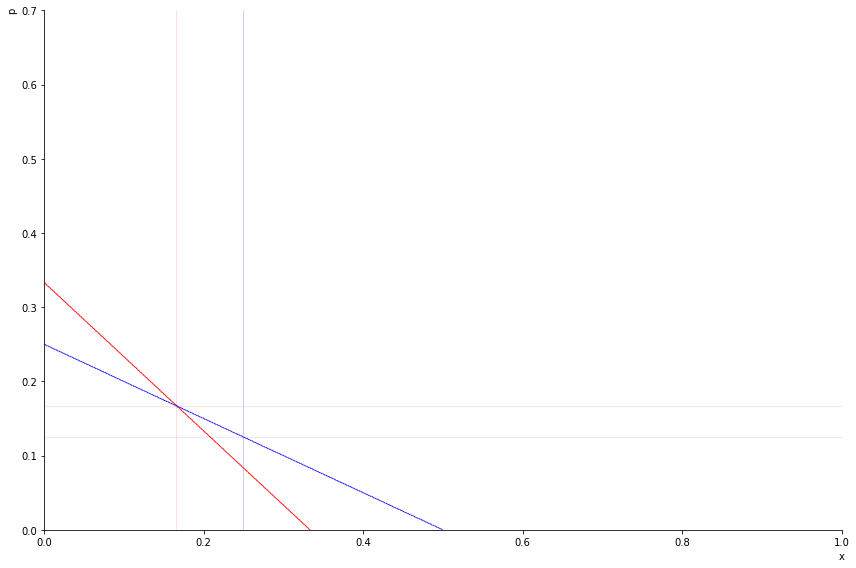

In [96]:
courbe_demande_2 = sp.plot_implicit(
    equation_demande_2, 
    (x, 0, 1), 
    (p, 0, 0.7),
    show=False
)
courbe_demande_2[0].line_color = "red"
equilibre_2_y = sp.plot_implicit(sp.Eq(p, pm2b), (x, 0, 1), (p, 0, pm2b), show=False)
equilibre_2_x = sp.plot_implicit(sp.Eq(x, nm2), (x, 0, nm2), (p, 0, 0.7), show=False)
equilibre_2_y[0].line_color = "red"
equilibre_2_x[0].line_color = "red"
courbe_demande_2.extend([equilibre_2_y[0], equilibre_2_x[0]])

courbe_demande_3 =  sp.plot_implicit(
    equation_demande_3, 
    (x, 0, 1), 
    (p, 0, 0.7),
    show=False
)
courbe_demande_2.append(courbe_demande_3[0])

equilibre_3_y = sp.plot_implicit(sp.Eq(p, pm3), (x, 0, 1), (p, 0, pm3), show=False)
equilibre_3_x = sp.plot_implicit(sp.Eq(x, nm3), (x, 0, nm3), (p, 0, 0.7), show=False)
courbe_demande_2.extend([equilibre_3_y[0], equilibre_3_x[0]])

courbe_demande_2.show()

**REMARQUE** on note l'intérêt d'améliorer la nomenclature entre les parties!

# Question 5

Suppose that there is a second group of consumers (of mass 1) who also have an opportunity costxthat is uniformly distributed on the unit interval.   The utility of consumerxin this second group is
$$1=4+n^e_1(p_1)=2−p_2−x,$$
where 
- $n^e_1(p_1)$ is the expected number of consumers in the first group buying theproduct 
- price $p_2$ is the price charged to the second group of consumers. 

Suppose that, similar to part 3, consumers of both groups first observe prices and then form beliefs. 
Thus, a consumer $x$ in the first group has net utility
$$1=4+n^e_1(p_1)=2−p_1−x.$$
Suppose that consumers from both groups hold self-fulfilling beliefs. 
Determine the monopoly solution (prices and quantities) under these consumer beliefs.

In [97]:
p1, p2 = sp.symbols("p_1 p_2")
p1, p2

In [115]:
ne1 = sp.Function("n^e_{1}")(p1)
ne1

In [116]:
utilite1 = sp.S(1) / 4 + ne1 / 2 - p1 - x
display(utilite1)
utilite2 = sp.S(1) / 4 + ne1 / 2 - p2 - x
display(utilite2)

In [117]:
demande1, = sp.solve(utilite1, x)
demande2, = sp.solve(utilite2, x)

profit = p1 * demande1 + p2 * demande2
display(demande1, demande2, profit)
print(sp.latex(profit))

p_{1} \left(- p_{1} + \frac{\operatorname{n^e_{1}}{\left(p_{1} \right)}}{2} + \frac{1}{4}\right) + p_{2} \left(- p_{2} + \frac{\operatorname{n^e_{1}}{\left(p_{1} \right)}}{2} + \frac{1}{4}\right)


On cherche maintenant à effectuer
$$
\underset{p_1\geq 0, p_2\geq 0}{\sup} p_{1} \left(\frac{n^e_{1}(p_1)}{2} - p_{1} + \frac{1}{4}\right) + p_{2} \left(\frac{n^e_{1}(p_1)}{2} - p_{2} + \frac{1}{4}\right)
$$

In [118]:
H = sp.hessian(profit, (p1, p2))
display(H)

⎡     2                       2                                               
⎢    d                       d                                                
⎢p₁⋅────(n_{1}__e(p₁))   p₂⋅────(n_{1}__e(p₁))                           d    
⎢      2                       2                                        ───(n_
⎢   dp₁                     dp₁                   d                     dp₁   
⎢───────────────────── + ───────────────────── + ───(n_{1}__e(p₁)) - 2  ──────
⎢          2                       2             dp₁                          
⎢                                                                             
⎢                           d                                                 
⎢                          ───(n_{1}__e(p₁))                                  
⎢                          dp₁                                                
⎢                          ─────────────────                                  
⎣                                  2                

**ATTENTION** Suite à reprendre car $n^e_1$ dépendait de $n_

In [107]:
gradient = [sp.diff(profit, p1), sp.diff(profit, p2)]
display(gradient)

In [110]:
sol, = sp.solve(gradient, (p1, p2), dict=True)
display(sol)

On voit que le point critique est dans l'intérieur du domaine de maximisation donc grâce à la stricte concavité il s'agit de l'unique maximum global.

Comme les consommateurs on des croyances auto-réalisatrices on en déduit

In [111]:
nm31, = sp.solve(sp.Eq(utilite1.subs(x, ne1), 0), ne1)
display(nm31)
nm32, = sp.solve(sp.Eq(utilite2.subs(x, ne1)))

# Question 6

Within the setting of part 5, suppose that the monopolist is forced to charge the same price to both groups of consumers; i.e.
$$p=p_1=p_2.$$
Determine the monopoly solution


# Question 7

Explain your findings in parts 5 and 6. 
Does the monopolist have an incentive to charge prices $p_1 \neq p_2$?

Why or why not is this the case?